In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Airline_Dataset.csv')

# Set up visualization style
sns.set(style="whitegrid")

In [2]:
# Function to parse dates with mixed formats
def parse_dates(date_str):
    for fmt in ("%m/%d/%Y", "%d-%m-%Y", "%Y-%m-%d"):  # Add more formats if needed
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

In [3]:
# Apply the date parsing function
data['Departure Date'] = data['Departure Date'].apply(parse_dates)

# Drop rows with NaT values in 'Departure Date'
data = data.dropna(subset=['Departure Date'])

# Extract month and year from Departure Date
data['Month_Year'] = data['Departure Date'].dt.to_period('M')

# Count the number of passengers per month
monthly_counts = data['Month_Year'].value_counts().sort_index()

# Number of flights over time

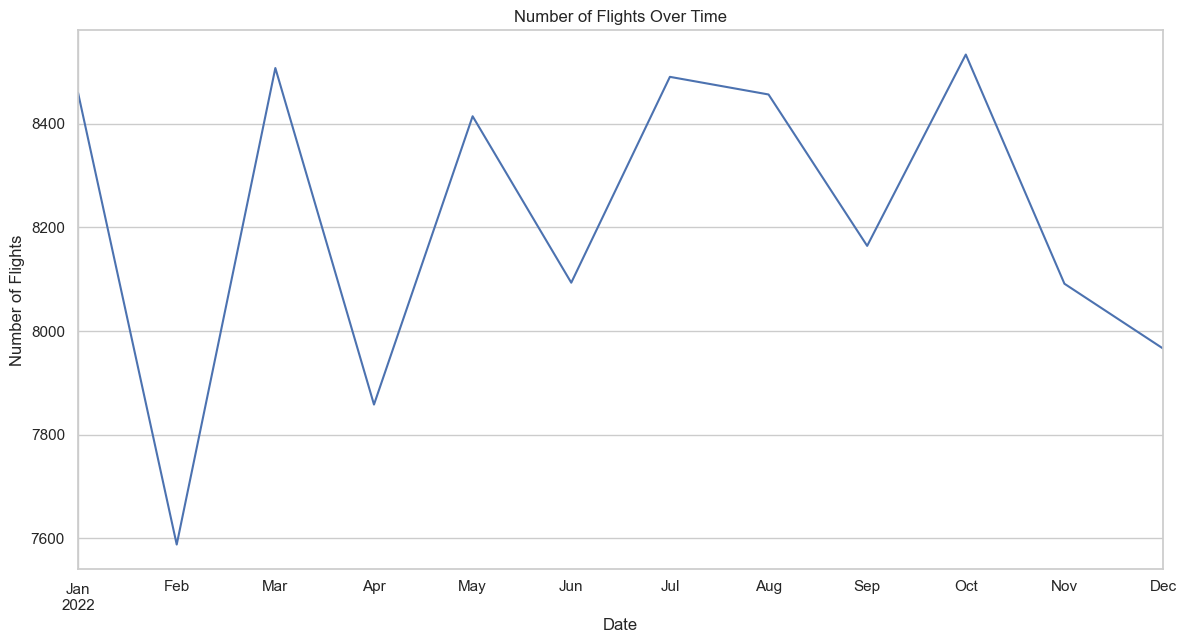

In [4]:
# Plot number of flights over time
plt.figure(figsize=(14, 7))
monthly_counts.plot()
plt.title('Number of Flights Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.show()

# The top 5 months with the most passengers

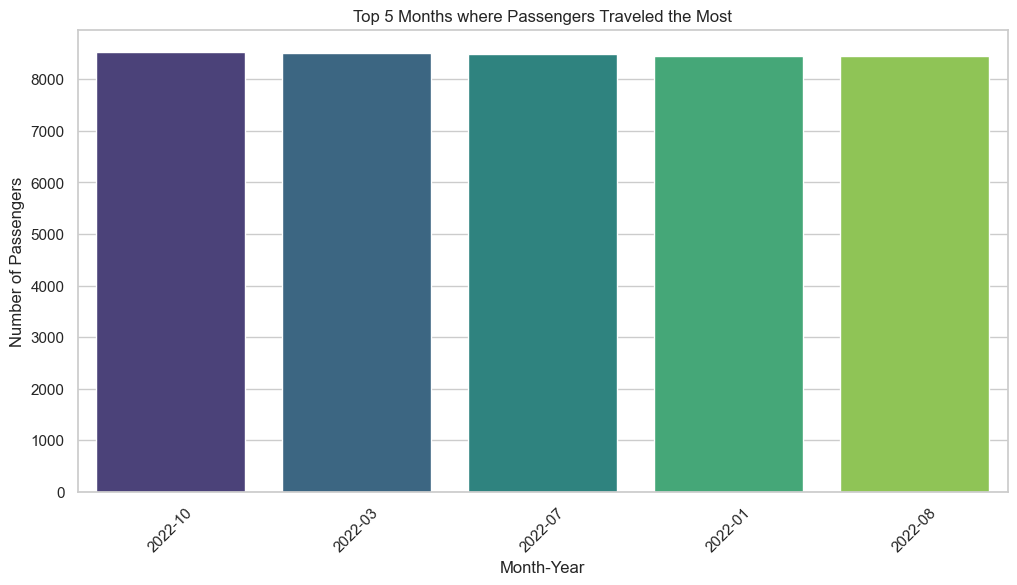

In [5]:
# Get the top 5 months with the most passengers
top_5_months = monthly_counts.nlargest(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_months.index.astype(str), y=top_5_months.values, palette="viridis")
plt.title('Top 5 Months where Passengers Traveled the Most')
plt.xlabel('Month-Year')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.show()

# The top 3 months with the most flights

<Figure size 1400x800 with 0 Axes>

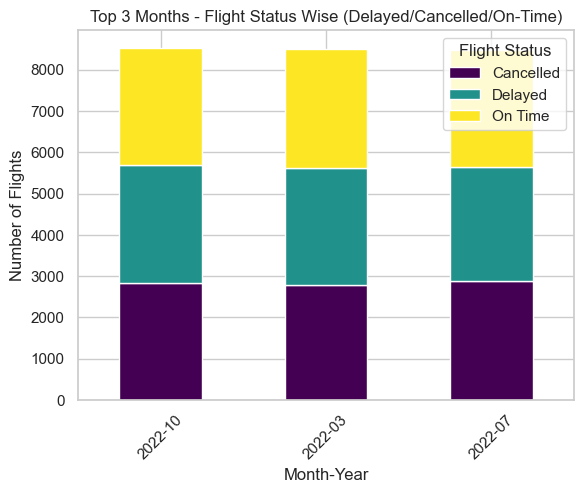

In [6]:
# Count the number of flights per month and flight status
monthly_status_counts = data.groupby(['Month_Year', 'Flight Status']).size().unstack(fill_value=0)

# Get the top 3 months with the most flights
top_3_months = monthly_status_counts.sum(axis=1).nlargest(3).index

# Filter the data to include only the top 3 months
top_3_months_data = monthly_status_counts.loc[top_3_months]

plt.figure(figsize=(14, 8))
top_3_months_data.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top 3 Months - Flight Status Wise (Delayed/Cancelled/On-Time)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()